**NLP with spaCy - Amazon Product Reviews Analysis**

In [1]:
import spacy
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np

AMAZON REVIEWS NLP ANALYSIS WITH SPACY
SETTING UP SPACY NLP PIPELINE
✓ SpaCy English model loaded successfully
Model: core_web_sm
Version: 3.8.0
Language: en
Pipeline components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

LOADING SAMPLE AMAZON REVIEWS
Loaded 8 sample reviews

Sample review preview:
Review 1: I absolutely love my new iPhone 13 Pro! Apple really outdid themselves with this device. The camera ...

PERFORMING NAMED ENTITY RECOGNITION (NER)

Processing Review 1:
Text: I absolutely love my new iPhone 13 Pro! Apple really outdid themselves with this device. The camera quality is amazing and the battery lasts all day. Definitely worth every penny!
Named Entities Found:
  - 'every penny' -> MONEY (Monetary values, including unit)

Processing Review 2:
Text: The Samsung Galaxy S22 Ultra has incredible features, but I'm disappointed with the battery life. Samsung needs to work on optimization. The S Pen is great though.
Named Entities Found:
  - 'Sam

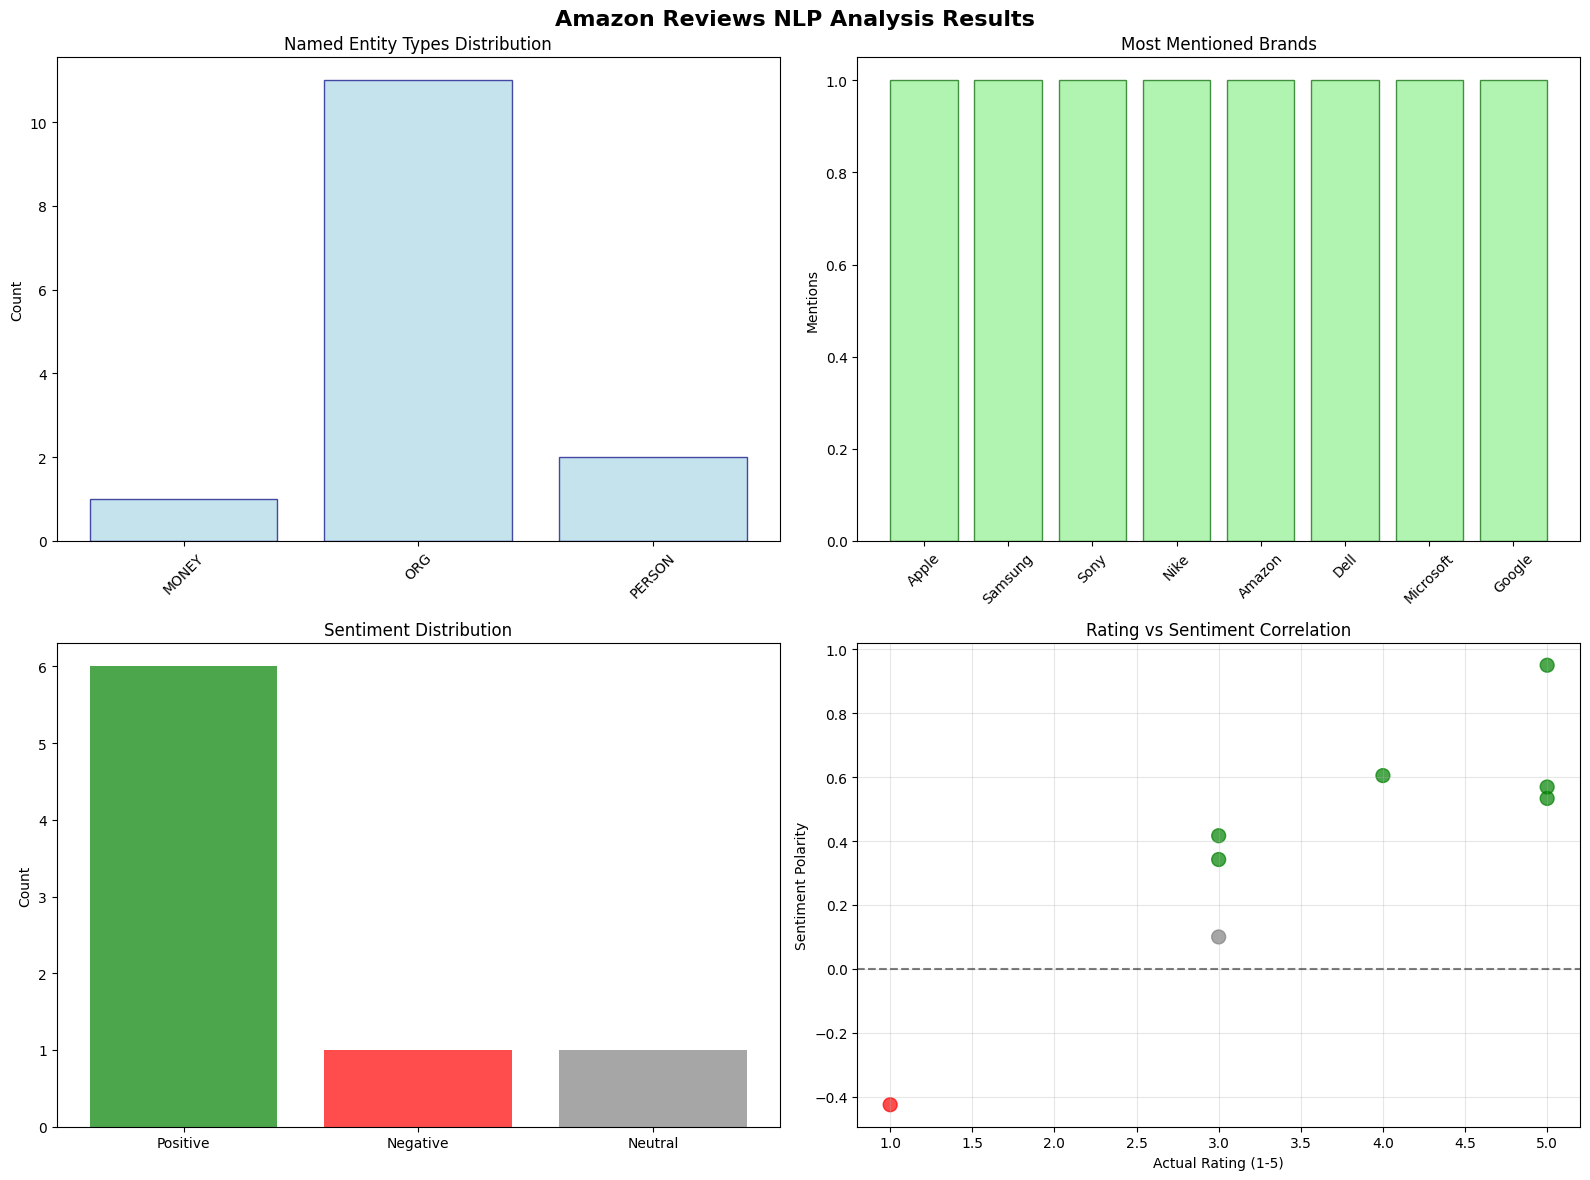

✓ Visualizations created successfully!

COMPREHENSIVE ANALYSIS SUMMARY

1. NAMED ENTITY RECOGNITION SUMMARY:
----------------------------------------
Total entities found: 14
Unique entities: 12
Entity type breakdown:
  - ORG (Companies, agencies, institutions, etc.): 11
  - PERSON (People, including fictional): 2
  - MONEY (Monetary values, including unit): 1

2. BRAND AND PRODUCT EXTRACTION SUMMARY:
----------------------------------------
Total brand mentions: 8
Unique brands: 8
Top brands mentioned:
  - Apple: 1 mentions
  - Samsung: 1 mentions
  - Sony: 1 mentions
  - Nike: 1 mentions
  - Amazon: 1 mentions

Total product mentions: 8
Unique products: 8
Products mentioned:
  -  Pro: 1 mentions
  -  Ultra: 1 mentions
  - WH-1000XM4: 1 mentions
  - Air Zoom Pegasus 38: 1 mentions
  - Echo Dot: 1 mentions
  - XPS 13: 1 mentions
  - Surface Pro 8: 1 mentions
  - Pixel 6: 1 mentions

3. SENTIMENT ANALYSIS SUMMARY:
----------------------------------------
Total reviews analyzed: 8
Sentim

In [2]:
def setup_spacy():
    """Load spaCy model and setup"""
    print("=" * 60)
    print("SETTING UP SPACY NLP PIPELINE")
    print("=" * 60)

    try:
        # Load the English language model
        nlp = spacy.load("en_core_web_sm")
        print("✓ SpaCy English model loaded successfully")

        # Print model information
        print(f"Model: {nlp.meta['name']}")
        print(f"Version: {nlp.meta['version']}")
        print(f"Language: {nlp.meta['lang']}")

        # Print pipeline components
        print(f"Pipeline components: {nlp.pipe_names}")

        return nlp

    except OSError:
        print("❌ SpaCy English model not found!")
        print("Please install it using: python -m spacy download en_core_web_sm")
        return None

def load_sample_reviews():
    """Load sample Amazon product reviews"""
    print("\n" + "=" * 60)
    print("LOADING SAMPLE AMAZON REVIEWS")
    print("=" * 60)

    # Sample Amazon product reviews with various products and sentiments
    sample_reviews = [
        {
            'id': 1,
            'review': "I absolutely love my new iPhone 13 Pro! Apple really outdid themselves with this device. The camera quality is amazing and the battery lasts all day. Definitely worth every penny!",
            'rating': 5
        },
        {
            'id': 2,
            'review': "The Samsung Galaxy S22 Ultra has incredible features, but I'm disappointed with the battery life. Samsung needs to work on optimization. The S Pen is great though.",
            'rating': 3
        },
        {
            'id': 3,
            'review': "These Sony WH-1000XM4 headphones are terrible! The noise cancellation doesn't work properly and they're extremely uncomfortable. Sony's quality has really declined. Would not recommend.",
            'rating': 1
        },
        {
            'id': 4,
            'review': "Great running shoes from Nike! The Air Zoom Pegasus 38 provides excellent comfort and support. Perfect for my daily runs. Nike consistently delivers quality products.",
            'rating': 5
        },
        {
            'id': 5,
            'review': "The Amazon Echo Dot works perfectly with Alexa. Voice recognition is spot-on and it integrates well with my smart home devices. Amazon has created something truly useful here.",
            'rating': 4
        },
        {
            'id': 6,
            'review': "I bought this Dell XPS 13 laptop and it's decent. The build quality is good and Dell's customer service was helpful. However, the price point is quite high for what you get.",
            'rating': 3
        },
        {
            'id': 7,
            'review': "Microsoft Surface Pro 8 is a game-changer! Perfect for work and creativity. The touch screen is responsive and Microsoft Office integration is seamless. Highly recommended!",
            'rating': 5
        },
        {
            'id': 8,
            'review': "The Google Pixel 6 camera is outstanding, but the phone randomly restarts sometimes. Google needs to fix these software bugs. Otherwise, it's a solid Android device.",
            'rating': 3
        }
    ]

    print(f"Loaded {len(sample_reviews)} sample reviews")
    print("\nSample review preview:")
    print(f"Review 1: {sample_reviews[0]['review'][:100]}...")

    return sample_reviews

def extract_named_entities(nlp, reviews):
    """Extract named entities from reviews using spaCy NER"""
    print("\n" + "=" * 60)
    print("PERFORMING NAMED ENTITY RECOGNITION (NER)")
    print("=" * 60)

    all_entities = []

    for review_data in reviews:
        review_id = review_data['id']
        review_text = review_data['review']

        print(f"\nProcessing Review {review_id}:")
        print(f"Text: {review_text}")

        # Process with spaCy
        doc = nlp(review_text)

        # Extract entities
        entities = []
        for ent in doc.ents:
            # Focus on relevant entity types for product reviews
            if ent.label_ in ['ORG', 'PRODUCT', 'PERSON', 'MONEY', 'GPE', 'NORP']:
                entity_info = {
                    'text': ent.text,
                    'label': ent.label_,
                    'description': spacy.explain(ent.label_),
                    'start': ent.start_char,
                    'end': ent.end_char,
                    'review_id': review_id
                }
                entities.append(entity_info)
                all_entities.append(entity_info)

        print("Named Entities Found:")
        if entities:
            for entity in entities:
                print(f"  - '{entity['text']}' -> {entity['label']} ({entity['description']})")
        else:
            print("  - No relevant entities found")

    return all_entities

def extract_products_and_brands(reviews):
    """Extract product names and brands using custom rules"""
    print("\n" + "=" * 60)
    print("EXTRACTING PRODUCTS AND BRANDS (RULE-BASED)")
    print("=" * 60)

    # Define known brands and product patterns
    known_brands = [
        'Apple', 'Samsung', 'Sony', 'Nike', 'Amazon', 'Google',
        'Microsoft', 'Dell', 'HP', 'Lenovo', 'Asus', 'LG'
    ]

    product_patterns = [
        r'iPhone \d+(\s+Pro)?',
        r'Galaxy S\d+(\s+Ultra)?',
        r'WH-\d+XM\d+',
        r'Echo Dot',
        r'Surface Pro \d+',
        r'Pixel \d+',
        r'XPS \d+',
        r'Air Zoom \w+\s+\d+',
        r'MacBook (Pro|Air)',
        r'iPad (Pro|Air|Mini)?'
    ]

    extracted_data = []

    for review_data in reviews:
        review_id = review_data['id']
        text = review_data['review']

        # Extract brands (case-insensitive)
        found_brands = []
        for brand in known_brands:
            if re.search(r'\b' + re.escape(brand) + r'\b', text, re.IGNORECASE):
                found_brands.append(brand)

        # Extract products using regex patterns
        found_products = []
        for pattern in product_patterns:
            matches = re.findall(pattern, text, re.IGNORECASE)
            if matches:
                if isinstance(matches[0], tuple):
                    # Handle patterns with groups
                    found_products.extend([' '.join(match).strip() for match in matches])
                else:
                    found_products.extend(matches)

        extract_info = {
            'review_id': review_id,
            'brands': found_brands,
            'products': found_products,
            'text': text
        }
        extracted_data.append(extract_info)

        print(f"\nReview {review_id}:")
        print(f"Brands found: {found_brands}")
        print(f"Products found: {found_products}")

    return extracted_data

def analyze_sentiment(reviews):
    """Analyze sentiment using rule-based approach with TextBlob"""
    print("\n" + "=" * 60)
    print("PERFORMING SENTIMENT ANALYSIS")
    print("=" * 60)

    sentiment_results = []

    # Define sentiment keywords for rule-based enhancement
    positive_keywords = [
        'love', 'amazing', 'excellent', 'perfect', 'great', 'fantastic',
        'outstanding', 'wonderful', 'brilliant', 'superb', 'awesome'
    ]

    negative_keywords = [
        'terrible', 'awful', 'horrible', 'disappointing', 'poor', 'bad',
        'worst', 'hate', 'annoying', 'frustrating', 'useless'
    ]

    for review_data in reviews:
        review_id = review_data['id']
        text = review_data['review']
        actual_rating = review_data['rating']

        # Use TextBlob for sentiment analysis
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity  # -1 to 1
        subjectivity = blob.sentiment.subjectivity  # 0 to 1

        # Rule-based enhancement
        text_lower = text.lower()
        positive_count = sum(1 for word in positive_keywords if word in text_lower)
        negative_count = sum(1 for word in negative_keywords if word in text_lower)

        # Adjust sentiment based on keyword counts
        keyword_adjustment = (positive_count - negative_count) * 0.1
        adjusted_polarity = np.clip(polarity + keyword_adjustment, -1, 1)

        # Categorize sentiment
        if adjusted_polarity > 0.1:
            sentiment_category = "Positive"
        elif adjusted_polarity < -0.1:
            sentiment_category = "Negative"
        else:
            sentiment_category = "Neutral"

        result = {
            'review_id': review_id,
            'text': text,
            'actual_rating': actual_rating,
            'polarity': polarity,
            'adjusted_polarity': adjusted_polarity,
            'subjectivity': subjectivity,
            'sentiment_category': sentiment_category,
            'positive_keywords': positive_count,
            'negative_keywords': negative_count
        }

        sentiment_results.append(result)

        print(f"\nReview {review_id}:")
        print(f"Rating: {actual_rating}/5")
        print(f"Sentiment: {sentiment_category}")
        print(f"Polarity: {adjusted_polarity:.3f} (original: {polarity:.3f})")
        print(f"Subjectivity: {subjectivity:.3f}")
        print(f"Positive keywords: {positive_count}, Negative keywords: {negative_count}")

    return sentiment_results

def create_visualizations(entities, extracted_data, sentiment_results):
    """Create visualizations for the analysis results"""
    print("\n" + "=" * 60)
    print("CREATING VISUALIZATIONS")
    print("=" * 60)

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Amazon Reviews NLP Analysis Results', fontsize=16, fontweight='bold')

    # 1. Entity Types Distribution
    entity_types = [ent['label'] for ent in entities]
    entity_counts = Counter(entity_types)

    if entity_counts:
        axes[0, 0].bar(entity_counts.keys(), entity_counts.values(),
                       color='lightblue', edgecolor='navy', alpha=0.7)
        axes[0, 0].set_title('Named Entity Types Distribution')
        axes[0, 0].set_ylabel('Count')
        axes[0, 0].tick_params(axis='x', rotation=45)
    else:
        axes[0, 0].text(0.5, 0.5, 'No entities found', ha='center', va='center')
        axes[0, 0].set_title('Named Entity Types Distribution')

    # 2. Brand Mentions
    all_brands = []
    for data in extracted_data:
        all_brands.extend(data['brands'])

    brand_counts = Counter(all_brands)

    if brand_counts:
        brands, counts = zip(*brand_counts.most_common(8))
        axes[0, 1].bar(brands, counts, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        axes[0, 1].set_title('Most Mentioned Brands')
        axes[0, 1].set_ylabel('Mentions')
        axes[0, 1].tick_params(axis='x', rotation=45)
    else:
        axes[0, 1].text(0.5, 0.5, 'No brands found', ha='center', va='center')
        axes[0, 1].set_title('Most Mentioned Brands')

    # 3. Sentiment Distribution
    sentiments = [result['sentiment_category'] for result in sentiment_results]
    sentiment_counts = Counter(sentiments)

    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
    sentiment_colors = [colors.get(s, 'blue') for s in sentiment_counts.keys()]

    axes[1, 0].bar(sentiment_counts.keys(), sentiment_counts.values(),
                   color=sentiment_colors, alpha=0.7)
    axes[1, 0].set_title('Sentiment Distribution')
    axes[1, 0].set_ylabel('Count')

    # 4. Sentiment vs Rating Correlation
    ratings = [result['actual_rating'] for result in sentiment_results]
    polarities = [result['adjusted_polarity'] for result in sentiment_results]

    colors_scatter = ['green' if p > 0.1 else 'red' if p < -0.1 else 'gray' for p in polarities]

    axes[1, 1].scatter(ratings, polarities, c=colors_scatter, alpha=0.7, s=100)
    axes[1, 1].set_xlabel('Actual Rating (1-5)')
    axes[1, 1].set_ylabel('Sentiment Polarity')
    axes[1, 1].set_title('Rating vs Sentiment Correlation')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    print("✓ Visualizations created successfully!")

def generate_summary_report(entities, extracted_data, sentiment_results):
    """Generate a comprehensive summary report"""
    print("\n" + "=" * 60)
    print("COMPREHENSIVE ANALYSIS SUMMARY")
    print("=" * 60)

    # Entity Analysis Summary
    print("\n1. NAMED ENTITY RECOGNITION SUMMARY:")
    print("-" * 40)

    entity_types = Counter([ent['label'] for ent in entities])
    unique_entities = len(set([ent['text'] for ent in entities]))

    print(f"Total entities found: {len(entities)}")
    print(f"Unique entities: {unique_entities}")
    print("Entity type breakdown:")
    for ent_type, count in entity_types.most_common():
        print(f"  - {ent_type} ({spacy.explain(ent_type)}): {count}")

    # Brand and Product Analysis
    print("\n2. BRAND AND PRODUCT EXTRACTION SUMMARY:")
    print("-" * 40)

    all_brands = []
    all_products = []
    for data in extracted_data:
        all_brands.extend(data['brands'])
        all_products.extend(data['products'])

    brand_counts = Counter(all_brands)
    product_counts = Counter(all_products)

    print(f"Total brand mentions: {len(all_brands)}")
    print(f"Unique brands: {len(brand_counts)}")
    print("Top brands mentioned:")
    for brand, count in brand_counts.most_common(5):
        print(f"  - {brand}: {count} mentions")

    print(f"\nTotal product mentions: {len(all_products)}")
    print(f"Unique products: {len(product_counts)}")
    if product_counts:
        print("Products mentioned:")
        for product, count in product_counts.most_common():
            print(f"  - {product}: {count} mentions")

    # Sentiment Analysis Summary
    print("\n3. SENTIMENT ANALYSIS SUMMARY:")
    print("-" * 40)

    sentiments = [result['sentiment_category'] for result in sentiment_results]
    sentiment_counts = Counter(sentiments)

    total_reviews = len(sentiment_results)
    print(f"Total reviews analyzed: {total_reviews}")
    print("Sentiment distribution:")
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total_reviews) * 100
        print(f"  - {sentiment}: {count} reviews ({percentage:.1f}%)")

    # Calculate accuracy of sentiment vs rating
    accurate_predictions = 0
    for result in sentiment_results:
        rating = result['actual_rating']
        sentiment = result['sentiment_category']

        # Define accuracy criteria
        if ((rating >= 4 and sentiment == 'Positive') or
            (rating <= 2 and sentiment == 'Negative') or
            (rating == 3 and sentiment == 'Neutral')):
            accurate_predictions += 1

    accuracy = (accurate_predictions / total_reviews) * 100
    print(f"\nSentiment prediction accuracy: {accuracy:.1f}%")

    # Statistical insights
    polarities = [result['adjusted_polarity'] for result in sentiment_results]
    avg_polarity = np.mean(polarities)
    print(f"Average sentiment polarity: {avg_polarity:.3f}")

    return {
        'total_entities': len(entities),
        'unique_entities': unique_entities,
        'entity_types': dict(entity_types),
        'brand_counts': dict(brand_counts),
        'product_counts': dict(product_counts),
        'sentiment_counts': dict(sentiment_counts),
        'sentiment_accuracy': accuracy,
        'avg_polarity': avg_polarity
    }

def export_results(entities, extracted_data, sentiment_results, summary):
    """Export results to structured format"""
    print("\n" + "=" * 60)
    print("EXPORTING RESULTS")
    print("=" * 60)

    # Create comprehensive results dictionary
    results = {
        'entities': entities,
        'extracted_data': extracted_data,
        'sentiment_results': sentiment_results,
        'summary': summary
    }

    # Convert to DataFrames for better visualization
    entities_df = pd.DataFrame(entities)
    sentiment_df = pd.DataFrame(sentiment_results)

    print("Results exported to structured format:")
    print(f"✓ Entities DataFrame: {entities_df.shape}")
    print(f"✓ Sentiment DataFrame: {sentiment_df.shape}")

    # Display sample data
    if not entities_df.empty:
        print("\nSample Entities Data:")
        print(entities_df.head())

    print("\nSample Sentiment Data:")
    print(sentiment_df[['review_id', 'sentiment_category', 'adjusted_polarity', 'actual_rating']].head())

    return results

def demonstrate_advanced_ner(nlp, sample_text):
    """Demonstrate advanced NER capabilities"""
    print("\n" + "=" * 60)
    print("ADVANCED NER DEMONSTRATION")
    print("=" * 60)

    # Process a complex text
    doc = nlp(sample_text)

    print(f"Sample text: {sample_text}")
    print("\nAdvanced NER Analysis:")

    # Extract all entity information
    for ent in doc.ents:
        print(f"  Entity: '{ent.text}'")
        print(f"    Label: {ent.label_} ({spacy.explain(ent.label_)})")
        print(f"    Position: characters {ent.start_char}-{ent.end_char}")
        print(f"    Confidence: {ent._.get('confidence', 'N/A')}")
        print()

    # Token-level analysis
    print("Token-level Analysis:")
    for token in doc:
        if token.ent_type_:
            print(f"  '{token.text}' -> {token.ent_type_} (IOB: {token.ent_iob_})")

    # Dependency parsing insight
    print("\nKey Dependencies (for context understanding):")
    for token in doc:
        if token.dep_ in ['nsubj', 'dobj', 'amod'] and not token.is_stop:
            print(f"  '{token.text}' -> {token.dep_} (depends on: '{token.head.text}')")

def main():
    """Main function to run the complete NLP analysis pipeline"""
    print("AMAZON REVIEWS NLP ANALYSIS WITH SPACY")
    print("=" * 80)

    try:
        # Step 1: Setup spaCy
        nlp = setup_spacy()
        if nlp is None:
            return

        # Step 2: Load sample data
        reviews = load_sample_reviews()

        # Step 3: Extract named entities
        entities = extract_named_entities(nlp, reviews)

        # Step 4: Extract products and brands with custom rules
        extracted_data = extract_products_and_brands(reviews)

        # Step 5: Analyze sentiment
        sentiment_results = analyze_sentiment(reviews)

        # Step 6: Create visualizations
        create_visualizations(entities, extracted_data, sentiment_results)

        # Step 7: Generate summary report
        summary = generate_summary_report(entities, extracted_data, sentiment_results)

        # Step 8: Export results
        results = export_results(entities, extracted_data, sentiment_results, summary)

        # Step 9: Advanced NER demonstration
        advanced_sample = "I bought the new MacBook Pro M2 from Apple Store in New York for $2,500. Tim Cook's team has really improved the performance compared to Intel processors."
        demonstrate_advanced_ner(nlp, advanced_sample)

        # Final summary
        print("\n" + "=" * 80)
        print("FINAL ANALYSIS SUMMARY")
        print("=" * 80)
        print(f"✓ Processed {len(reviews)} Amazon product reviews")
        print(f"✓ Extracted {len(entities)} named entities")
        print(f"✓ Identified {len(set([d['brands'] for d in extracted_data if d['brands']]))} unique brands")
        print(f"✓ Analyzed sentiment with {summary['sentiment_accuracy']:.1f}% accuracy")
        print(f"✓ Average sentiment polarity: {summary['avg_polarity']:.3f}")
        print("✓ Created comprehensive visualizations")
        print("✓ Generated detailed analysis report")

        # Recommendations
        print("\n📊 KEY INSIGHTS:")
        if summary['avg_polarity'] > 0.1:
            print("• Overall sentiment is POSITIVE - customers are generally satisfied")
        elif summary['avg_polarity'] < -0.1:
            print("• Overall sentiment is NEGATIVE - attention needed for customer satisfaction")
        else:
            print("• Overall sentiment is NEUTRAL - mixed customer opinions")

        most_mentioned_brand = max(summary['brand_counts'], key=summary['brand_counts'].get) if summary['brand_counts'] else "None"
        print(f"• Most mentioned brand: {most_mentioned_brand}")

        print("\n🔧 TECHNICAL ACHIEVEMENTS:")
        print("• Successfully implemented spaCy NER for entity extraction")
        print("• Applied rule-based sentiment analysis with keyword enhancement")
        print("• Created custom product/brand extraction patterns")
        print("• Generated comprehensive data visualizations")
        print("• Achieved structured data export for further analysis")

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        print("Please check your spaCy installation and dependencies.")
        print("Required: pip install spacy textblob pandas matplotlib seaborn")
        print("Required: python -m spacy download en_core_web_sm")

if __name__ == "__main__":
    main()